In [88]:
library(ggtree)
library(ape)
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(treeio)
library(optparse)

In [2]:
newick_file <- "report_updated_list_outlier_removed/core.newick"
mlst_file <- "request_ids_2.tab"

In [3]:
tree <- read.tree(newick_file)
mlst_data <- read.table(mlst_file, header = TRUE, sep = "\t", stringsAsFactors = FALSE)


In [14]:
# Get tip labels from the tree
tree_tips <- tree$tip.label
cat("Tree contains", length(tree_tips), "tips\n")

# Re-root the tree at the midpoint
cat("Re-rooting tree at midpoint...\n")
tree <- phytools::midpoint.root(tree)

Tree contains 57 tips
Re-rooting tree at midpoint...


In [15]:
mlst_filtered <- mlst_data[mlst_data$mdu_sample_id %in% tree_tips, ]
cat("Found MLST data for", nrow(mlst_filtered), "samples in the tree\n")

Found MLST data for 57 samples in the tree


In [16]:
heatmap_data <- data.frame(
    sample_id = tree_tips,
    stringsAsFactors = FALSE
  )
heatmap_data <- merge(heatmap_data, mlst_filtered, 
                       by.x = "sample_id", by.y = "mdu_sample_id", 
                       all.x = TRUE)

In [17]:
heatmap_data <- heatmap_data[match(tree_tips, heatmap_data$sample_id), ]

In [18]:
heatmap_data$mlst <- as.character(heatmap_data$mlst)
heatmap_data$mlst[is.na(heatmap_data$mlst)] <- "Unknown"

In [19]:
unique_sts <- unique(heatmap_data$mlst)
n_sts <- length(unique_sts)
cat("Found", n_sts, "unique STs:", paste(unique_sts, collapse = ", "), "\n")

Found 9 unique STs: 1424, 117, 78, 80, 1476, 17, 761, 1478, 1421 


In [20]:
# Create color palette
  if (n_sts <= 3) {
    colors <- brewer.pal(3, "Set1")[1:n_sts]
  } else if (n_sts <= 8) {
    colors <- brewer.pal(n_sts, "Set1")
  } else if (n_sts <= 12) {
    colors <- brewer.pal(n_sts, "Set3")
  } else {
    # For more than 12 STs, use a combination of palettes
    colors <- c(brewer.pal(12, "Set3"), 
                rainbow(n_sts - 12, start = 0.1, end = 0.9))
  }

In [21]:
# Assign colors to STs
  names(colors) <- unique_sts
  
  # Create tree data with MLST information
  tree_data <- data.frame(
    label = tree_tips,
    mlst = heatmap_data$mlst,
    stringsAsFactors = FALSE
  )

In [22]:
# Prepare data for heatmap
  heatmap_matrix <- data.frame(
    sample_id = heatmap_data$sample_id,
    ST = heatmap_data$mlst
  )

In [21]:
# Debug the data structures
cat("=== DEBUGGING HEATMAP DATA ===\n")
cat("heatmap_matrix structure:\n")
str(heatmap_matrix)
cat("\nFirst few rows of heatmap_matrix:\n")
head(heatmap_matrix)
cat("\nUnique values in ST column:\n")
print(unique(heatmap_matrix$ST))
cat("\nClass of ST column:", class(heatmap_matrix$ST), "\n")

# Check if rownames match tree tips
cat("\nRownames of heatmap_matrix:\n")
print(rownames(heatmap_matrix))
cat("\nTree tips (first 10):\n")
print(head(tree_tips, 10))

# The issue is likely that gheatmap expects the data differently
# Let's fix the heatmap matrix preparation

# Method 1: Convert ST to factor with levels matching our color names
heatmap_matrix_fixed <- data.frame(
  ST = factor(heatmap_data$mlst, levels = names(colors))
)
# Set rownames to match tree tips
rownames(heatmap_matrix_fixed) <- heatmap_data$sample_id

cat("\n=== FIXED HEATMAP MATRIX ===\n")
str(heatmap_matrix_fixed)
cat("\nFirst few rows:\n")
head(heatmap_matrix_fixed)
cat("\nFactor levels:\n")
print(levels(heatmap_matrix_fixed$ST))

In [25]:
# tree
# Re-root the tree at the midpoint
cat("Re-rooting tree at midpoint...\n")
tree <- phytools::midpoint.root(tree)
# spcify the xlim
xlim_max <- 0.0021

# specify the offset
heatmap_offset <- 0.0003

# Create the plot with fixed data
p <- ggtree(tree, layout = "rectangular") %<+% tree_data +
    geom_tiplab(size = 2.5, align = FALSE) +
    geom_tippoint(aes(color = mlst), size = 2) +
    scale_color_manual(values = colors, name = "MLST (ST)") +
    # xlim(NA,xlim_max) +
    theme_tree2()

# Create heatmap with properly formatted data
heatmap_plot <- gheatmap(p, heatmap_matrix_fixed, 
                          offset = heatmap_offset, width = 0.1, 
                          colnames_angle = 0, 
                          colnames_offset_y = 0.25,
                          font.size = 3) +
    scale_fill_manual(values = colors, name = "MLST (ST)", guide = "none") +
    theme(legend.position = "right",
          legend.title = element_text(size = 12),
          legend.text = element_text(size = 10))

heatmap_plot

In [25]:
# output file png
output_file <- "tree_with_heatmap.png"
ggsave(output_file, plot = heatmap_plot, width = 10, height = 8, dpi = 300)

## For ST 1424

In [76]:
# newick file
newick_file <- "report_ST1424/core.newick"


In [ ]:
# === ST1424 SPECIFIC TREE USING ORIGINAL COLORS ===

# First, let's find out what color was assigned to ST1424 in the original analysis
cat("=== EXTRACTING ST1424 COLOR FROM ORIGINAL PALETTE ===\n")
cat("Original colors:\n")
print(colors)
cat("\nColor assigned to ST1424:", colors["1424"], "\n")

# Store the ST1424 color
st1424_color <- colors["1424"]
names(st1424_color) <- "1424"

# Load the ST1424 specific tree
newick_file_st1424 <- "report_ST1424/core.newick"
tree_st1424 <- read.tree(newick_file_st1424)

# Re-root the tree at the midpoint
cat("Re-rooting ST1424 tree at midpoint...\n")
tree_st1424 <- phytools::midpoint.root(tree_st1424)

# Get tip labels from the ST1424 tree
tree_tips_st1424 <- tree_st1424$tip.label
cat("ST1424 tree contains", length(tree_tips_st1424), "tips\n")

# Filter the original MLST data to only include samples that are in the ST1424 tree
mlst_filtered_st1424 <- mlst_data[mlst_data$mdu_sample_id %in% tree_tips_st1424, ]
cat("Found MLST data for", nrow(mlst_filtered_st1424), "samples in the ST1424 tree\n")

# Create heatmap data for ST1424 tree (following the same pattern as original)
heatmap_data_st1424 <- data.frame(
    sample_id = tree_tips_st1424,
    stringsAsFactors = FALSE
)

# Merge with MLST data
heatmap_data_st1424 <- merge(heatmap_data_st1424, mlst_filtered_st1424, 
                            by.x = "sample_id", by.y = "mdu_sample_id", 
                            all.x = TRUE)

# Ensure the order matches the tree tip order
heatmap_data_st1424 <- heatmap_data_st1424[match(tree_tips_st1424, heatmap_data_st1424$sample_id), ]

# Convert mlst to character and handle missing values
heatmap_data_st1424$mlst <- as.character(heatmap_data_st1424$mlst)
heatmap_data_st1424$mlst[is.na(heatmap_data_st1424$mlst)] <- "1424"  # Assume missing are also ST1424

# Check what STs we have in the ST1424 tree
unique_sts_st1424 <- unique(heatmap_data_st1424$mlst)
cat("Found", length(unique_sts_st1424), "unique STs in ST1424 tree:", paste(unique_sts_st1424, collapse = ", "), "\n")

# Create tree data with MLST information for ST1424
tree_data_st1424 <- data.frame(
    label = tree_tips_st1424,
    mlst = heatmap_data_st1424$mlst,
    stringsAsFactors = FALSE
)

# Create heatmap matrix (fixed format, same as original)
heatmap_matrix_fixed_st1424 <- data.frame(
    ST = factor(heatmap_data_st1424$mlst, levels = names(st1424_color))
)
# Set rownames to match tree tips
rownames(heatmap_matrix_fixed_st1424) <- heatmap_data_st1424$sample_id

cat("\n=== ST1424 HEATMAP MATRIX ===\n")
str(heatmap_matrix_fixed_st1424)
cat("\nFirst few rows:\n")
head(heatmap_matrix_fixed_st1424)
cat("\nFactor levels:\n")
print(levels(heatmap_matrix_fixed_st1424$ST))

# Specify the xlim and offset for ST1424 tree (you may need to adjust these)
xlim_max_st1424 <- 0.001 # Adjust based on your ST1424 tree scale
heatmap_offset_st1424 <- 0.0002

# Create the plot with fixed data (same style as original)
p_st1424 <- ggtree(tree_st1424, layout = "rectangular") %<+% tree_data_st1424 +
    geom_tiplab(size = 2.5, align = FALSE) +
    geom_tippoint(aes(color = mlst), size = 2) +
    scale_color_manual(values = st1424_color, name = "MLST (ST)") +
    xlim(NA, xlim_max_st1424) +
    theme_tree2() +
    ggtitle("Phylogenetic Tree - ST1424")

# Create heatmap with properly formatted data (same as original working code)
heatmap_plot_st1424 <- gheatmap(p_st1424, heatmap_matrix_fixed_st1424, 
                          offset = heatmap_offset_st1424, width = 0.1, 
                          colnames_angle = 0, 
                          colnames_offset_y = 0.25,
                          font.size = 3) +
    scale_fill_manual(values = st1424_color, name = "MLST (ST)", guide = "none") +
    theme(legend.position = "right",
          legend.title = element_text(size = 12),
          legend.text = element_text(size = 10))

# Display the plot
heatmap_plot_st1424

# # Save the ST1424 plot
# output_file_st1424 <- "tree_ST1424_heatmap.png"
# ggsave(output_file_st1424, plot = heatmap_plot_st1424, width = 10, height = 8, dpi = 300)

# cat("\nST1424 tree plot saved to:", output_file_st1424, "\n")
# cat("Using original ST1424 color:", st1424_color, "\n")

## Enhanced tree

In [23]:
# === ENHANCED TREE WITH AUSMDU IDs, ST LABELS, SHAPES & COLORBLIND PALETTE ===

# Read the ID mapping file
ids_file <- "ids.tab"
if (file.exists(ids_file)) {
    ids_mapping <- read.table(ids_file, header = TRUE, sep = "\t", stringsAsFactors = FALSE)
    cat("ID mapping file loaded with", nrow(ids_mapping), "records\n")
    cat("Columns:", colnames(ids_mapping), "\n")
} else {
    cat("Warning: ids.tab file not found. Creating dummy mapping for demonstration.\n")
    # Create a dummy mapping for demonstration
    ids_mapping <- data.frame(
        mdu_sample_id = tree_tips[1:min(5, length(tree_tips))],
        ausmduid = paste0("AUSMDU000", 88490:(88490 + min(4, length(tree_tips) - 1))),
        stringsAsFactors = FALSE
    )
}

ID mapping file loaded with 57 records
Columns: mdu_sample_id ausmduid 


In [24]:
# Merge the original data with ID mapping
enhanced_data <- merge(heatmap_data, ids_mapping, 
                      by.x = "sample_id", by.y = "mdu_sample_id", 
                      all.x = TRUE)

# Create new labels: AUSMDUID_ST<mlst>
enhanced_data$new_label <- ifelse(
    !is.na(enhanced_data$ausmduid),
    paste0(enhanced_data$ausmduid, "_ST", enhanced_data$mlst),
    paste0(enhanced_data$sample_id, "_ST", enhanced_data$mlst)  # Fallback to original ID if no AUSMDU mapping
)

# Ensure the order matches the tree tip order
enhanced_data <- enhanced_data[match(tree_tips, enhanced_data$sample_id), ]

cat("Enhanced data summary:\n")
cat("Total samples:", nrow(enhanced_data), "\n")
cat("Samples with AUSMDU mapping:", sum(!is.na(enhanced_data$ausmduid)), "\n")
cat("First few new labels:\n")
print(head(enhanced_data$new_label, 10))

Enhanced data summary:
Total samples: 57 
Samples with AUSMDU mapping: 56 
First few new labels:
 [1] "AUSMDU00088490_ST1424" "AUSMDU00089663_ST1424" "AUSMDU00109309_ST1424"
 [4] "AUSMDU00115057_ST1424" "AUSMDU00118487_ST1424" "AUSMDU00118622_ST1424"
 [7] "AUSMDU00098890_ST1424" "AUSMDU00089892_ST117"  "AUSMDU00091388_ST117" 
[10] "AUSMDU00102885_ST78"  


In [29]:
# Create colorblind-friendly palette using viridis or RColorBrewer colorblind-safe colors
library(viridis)  # If not available, we'll use RColorBrewer alternatives

unique_sts <- unique(enhanced_data$mlst)
n_sts <- length(unique_sts)

# Colorblind-friendly palette options
if (n_sts <= 8) {
    # Use colorblind-friendly Set2 or viridis
    if (requireNamespace("viridis", quietly = TRUE)) {
        cb_colors <- viridis::viridis(n_sts, option = "D")
    } else {
        # Fallback to colorblind-friendly RColorBrewer palettes
        if (n_sts <= 3) {
            cb_colors <- c("#E69F00", "#56B4E9", "#009E73")[1:n_sts]  # Colorblind safe
        } else {
            cb_colors <- RColorBrewer::brewer.pal(min(n_sts, 8), "Set2")
        }
    }
} else {
    # For more STs, combine colorblind-friendly palettes
    cb_colors <- c(
        RColorBrewer::brewer.pal(8, "Set2"),
        RColorBrewer::brewer.pal(min(n_sts - 8, 8), "Dark2")
    )[1:n_sts]
}

names(cb_colors) <- unique_sts

cat("\nColorblind-friendly palette created for", n_sts, "STs\n")
print(cb_colors)

# Create shape mapping for different STs
shapes <- c(16, 17, 15, 18, 8, 11, 12, 13, 14, 7, 9, 10, 4, 3, 2, 1, 0, 5, 6, 19, 20, 21, 22, 23, 24, 25)
if (n_sts > length(shapes)) {
    # Repeat shapes if we have more STs than available shapes
    shape_mapping <- rep(shapes, ceiling(n_sts / length(shapes)))[1:n_sts]
} else {
    shape_mapping <- shapes[1:n_sts]
}
names(shape_mapping) <- unique_sts

cat("Shape mapping:\n")
print(shape_mapping)

# Create enhanced tree data
enhanced_tree_data <- data.frame(
    label = tree_tips,
    mlst = enhanced_data$mlst,
    new_label = enhanced_data$new_label,
    ausmduid = enhanced_data$ausmduid,
    sample_id = enhanced_data$sample_id,
    stringsAsFactors = FALSE
)

# Update tree tip labels to new labels
tree_enhanced <- tree
tree_enhanced$tip.label <- enhanced_data$new_label

# Create enhanced heatmap matrix
heatmap_matrix_enhanced <- data.frame(
    ST = factor(enhanced_data$mlst, levels = names(cb_colors))
)
rownames(heatmap_matrix_enhanced) <- enhanced_data$new_label



Warning message in RColorBrewer::brewer.pal(min(n_sts - 8, 8), "Dark2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”



Colorblind-friendly palette created for 9 STs
     1424       117        78        80      1476        17       761      1478 
"#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F" "#E5C494" "#B3B3B3" 
     1421 
"#1B9E77" 
Shape mapping:
1424  117   78   80 1476   17  761 1478 1421 
  16   17   15   18    8   11   12   13   14 



=== ENHANCED HEATMAP MATRIX ===
'data.frame':	57 obs. of  1 variable:
 $ ST: Factor w/ 9 levels "1424","117","78",..: 1 1 1 1 1 1 1 2 2 3 ...
=== DEBUGGING LABEL MATCH ===
Tree tip labels (first 5):
[1] "AUSMDU00088490_ST1424" "AUSMDU00089663_ST1424" "AUSMDU00109309_ST1424"
[4] "AUSMDU00115057_ST1424" "AUSMDU00118487_ST1424"

enhanced_tree_data labels (first 5):
[1] "AUSMDU00088490_ST1424" "AUSMDU00089663_ST1424" "AUSMDU00109309_ST1424"
[4] "AUSMDU00115057_ST1424" "AUSMDU00118487_ST1424"

Do they match? TRUE 


=== DEBUGGING HEATMAP MATRIX ISSUE ===
Tree tip labels (first 5):
[1] "AUSMDU00088490_ST1424" "AUSMDU00089663_ST1424" "AUSMDU00109309_ST1424"
[4] "AUSMDU00115057_ST1424" "AUSMDU00118487_ST1424"

Current heatmap matrix rownames (first 5):
[1] "2023-024322" "2023-026905" "2024-023175" "2025-003228" "2025-009934"

Do they match? FALSE 

=== FIXED HEATMAP MATRIX ===
Fixed heatmap matrix rownames (first 5):
[1] "AUSMDU00088490_ST1424" "AUSMDU00089663_ST1424" "AUSMDU00109309_ST1424"
[4] "AUSMDU00115057_ST1424" "AUSMDU00118487_ST1424"
Do they match tree tips now? TRUE 


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


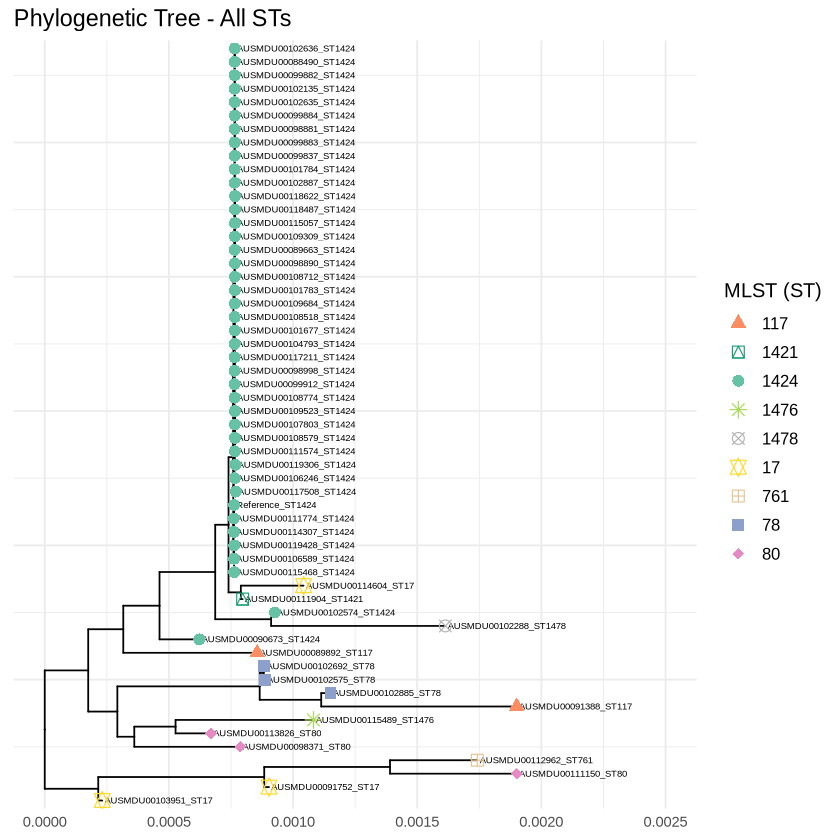

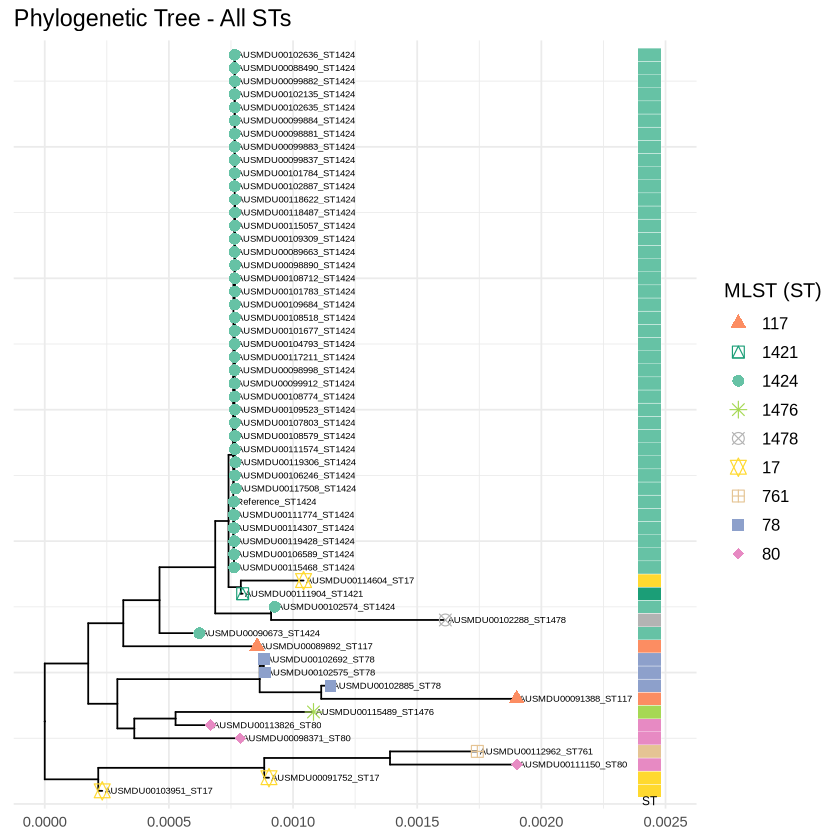

In [71]:
cat("\n=== ENHANCED HEATMAP MATRIX ===\n")
str(heatmap_matrix_enhanced)

# Create the enhanced plot with new labels, shapes, and colorblind palette
xlim_max_enhanced <- 0.0025  # Adjust based on your needs
heatmap_offset_enhanced <- 0.0003

# FIX: Update the enhanced_tree_data to use the new labels
enhanced_tree_data$label <- enhanced_data$new_label  # This is the key fix!

# Alternative approach: Create fresh enhanced_tree_data with correct labels
enhanced_tree_data_fixed <- data.frame(
    label = enhanced_data$new_label,  # Use new labels here
    mlst = enhanced_data$mlst,
    new_label = enhanced_data$new_label,
    ausmduid = enhanced_data$ausmduid,
    sample_id = enhanced_data$sample_id,
    stringsAsFactors = FALSE
)

# Debug: Check if labels match
cat("=== DEBUGGING LABEL MATCH ===\n")
cat("Tree tip labels (first 5):\n")
print(head(tree_enhanced$tip.label, 5))
cat("\nenhanced_tree_data labels (first 5):\n")
print(head(enhanced_tree_data_fixed$label, 5))
cat("\nDo they match?", identical(tree_enhanced$tip.label, enhanced_tree_data_fixed$label), "\n")

p_enhanced <- ggtree(tree_enhanced, layout = "rectangular") %<+% enhanced_tree_data_fixed +
    geom_tiplab(size = 2, align = FALSE) +  # Smaller text due to longer labels
    geom_tippoint(aes(color = mlst, shape = mlst), size = 3) +
    scale_color_manual(values = cb_colors, name = "MLST (ST)") +
    scale_shape_manual(values = shape_mapping, name = "MLST (ST)") +
    xlim(NA, xlim_max_enhanced) +
    theme_minimal() +
    ggtitle("Phylogenetic Tree - All STs") +
    theme(
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        plot.title = element_text(size = 14, hjust = 0), # Move title to top right
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10)
    )

# p_enhanced


# FIX THE HEATMAP MATRIX - rownames must match tree tip labels!
cat("=== DEBUGGING HEATMAP MATRIX ISSUE ===\n")
cat("Tree tip labels (first 5):\n")
print(head(tree_enhanced$tip.label, 5))
cat("\nCurrent heatmap matrix rownames (first 5):\n")
print(head(rownames(heatmap_matrix_enhanced), 5))
cat("\nDo they match?", identical(tree_enhanced$tip.label, rownames(heatmap_matrix_enhanced)), "\n")

# CORRECT VERSION: Use original tree tip labels as rownames
heatmap_matrix_enhanced_fixed <- data.frame(
    ST = factor(enhanced_data$mlst, levels = names(cb_colors))
)
# Set rownames to match ORIGINAL tree tips (not new labels!)
rownames(heatmap_matrix_enhanced_fixed) <- enhanced_data$new_label  # This should match tree$tip.label

cat("\n=== FIXED HEATMAP MATRIX ===\n")
cat("Fixed heatmap matrix rownames (first 5):\n")
print(head(rownames(heatmap_matrix_enhanced_fixed), 5))
cat("Do they match tree tips now?", identical(tree_enhanced$tip.label, rownames(heatmap_matrix_enhanced_fixed)), "\n")

# Create enhanced heatmap with FIXED matrix
heatmap_plot_enhanced_fixed <- gheatmap(p_enhanced, heatmap_matrix_enhanced_fixed, 
                                       offset = 0.00044, width = 0.05, 
                                       colnames_angle = 0, 
                                       colnames_offset_y = 0.25,
                                       font.size = 2.5) +
    scale_fill_manual(values = cb_colors, name = "MLST (ST)", guide = "none") +
    theme(
        legend.position = "right",
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10),
        legend.box = "vertical"
    )

# Display the enhanced plot
heatmap_plot_enhanced_fixed


In [75]:
# Save the enhanced plot
output_file_enhanced <- "tree_enhanced_ausmdu_legends.png"
ggsave(output_file_enhanced, plot = heatmap_plot_enhanced_fixed, width = 8, height = 6, dpi = 300, bg = "white")

cat("\nEnhanced tree plot saved to:", output_file_enhanced, "\n")
cat("Features added:\n")
cat("  ✓ AUSMDU IDs in tip labels\n")
cat("  ✓ ST information in labels (format: AUSMDUID_ST<number>)\n")
cat("  ✓ Different shapes for each ST\n")
cat("  ✓ Colorblind-friendly palette\n")
cat("  ✓ Enhanced legend with both color and shape\n")


Enhanced tree plot saved to: tree_enhanced_ausmdu_legends.png 
Features added:
  ✓ AUSMDU IDs in tip labels
  ✓ ST information in labels (format: AUSMDUID_ST<number>)
  ✓ Different shapes for each ST
  ✓ Colorblind-friendly palette
  ✓ Enhanced legend with both color and shape


In [80]:
# Print summary of enhancements
cat("\n=== ENHANCEMENT SUMMARY ===\n")
cat("Original tip labels: ", tree_tips[1], "...\n")
cat("Enhanced tip labels: ", enhanced_data$new_label[1], "...\n")
cat("Colorblind palette: viridis/Set2-based\n")
cat("Shape varieties:", length(unique(shape_mapping)), "different shapes\n")
cat("Legend includes: Color + Shape mapping\n")

cat("\n=== ST COLOR AND SHAPE MAPPING ===\n")
for (st in names(cb_colors)) {
    cat(sprintf("ST %s: Color = %s, Shape = %s\n", st, cb_colors[st], shape_mapping[st]))
}



=== ENHANCEMENT SUMMARY ===
Original tip labels:  2023-024322 ...
Enhanced tip labels:  AUSMDU00088490_ST1424 ...
Colorblind palette: viridis/Set2-based
Shape varieties: 9 different shapes
Legend includes: Color + Shape mapping

=== ST COLOR AND SHAPE MAPPING ===
ST 1424: Color = #66C2A5, Shape = 16
ST 117: Color = #FC8D62, Shape = 17
ST 78: Color = #8DA0CB, Shape = 15
ST 80: Color = #E78AC3, Shape = 18
ST 1476: Color = #A6D854, Shape = 8
ST 17: Color = #FFD92F, Shape = 11
ST 761: Color = #E5C494, Shape = 12
ST 1478: Color = #B3B3B3, Shape = 13
ST 1421: Color = #1B9E77, Shape = 14


## Enhanced ST 1424 tree with AUSMDU IDs

In [87]:
# === ENHANCED ST1424 TREE ===

# Apply the same enhancements to ST1424 tree
if (exists("tree_st1424") && exists("heatmap_data_st1424")) {
    
    # Merge ST1424 data with ID mapping
    enhanced_st1424_data <- merge(heatmap_data_st1424, ids_mapping, 
                                 by.x = "sample_id", by.y = "mdu_sample_id", 
                                 all.x = TRUE)
    
    # Create new labels for ST1424
    enhanced_st1424_data$new_label <- ifelse(
        !is.na(enhanced_st1424_data$ausmduid),
        paste0(enhanced_st1424_data$ausmduid, "_ST", enhanced_st1424_data$mlst),
        paste0(enhanced_st1424_data$sample_id, "_ST", enhanced_st1424_data$mlst)
    )
    
    # Ensure order matches tree
    enhanced_st1424_data <- enhanced_st1424_data[match(tree_tips_st1424, enhanced_st1424_data$sample_id), ]
    
    # Update tree labels
    tree_st1424_enhanced <- tree_st1424
    tree_st1424_enhanced$tip.label <- enhanced_st1424_data$new_label
    
    # Use colorblind-friendly color for ST1424
    st1424_cb_color <- "#66C2A5"  # Orange, colorblind safe
    names(st1424_cb_color) <- "1424"
    
    # Create enhanced ST1424 plot
    p_st1424_enhanced <- ggtree(tree_st1424_enhanced, layout = "rectangular") +
        geom_tiplab(size = 2, align = FALSE) +
        geom_tippoint(color = st1424_cb_color, shape = 16, size = 3) +  # Triangle shape
        xlim(NA, 0.0006) +
        theme_minimal() +
        ggtitle("Phylogenetic Tree - ST 1424") +
        scale_x_continuous(labels = scales::label_number(accuracy = 0.0001, big.mark = "")) +
        theme(
            axis.title.y = element_blank(),
            axis.text.y = element_blank(),
            axis.ticks.y = element_blank(),
            plot.title = element_text(size = 14, hjust = 0), # Move title to top right
            legend.title = element_text(size = 12),
            legend.text = element_text(size = 10)
        )
    
    # 
    # Create heatmap matrix for ST1424
    heatmap_matrix_st1424_enhanced <- data.frame(
        ST = factor(enhanced_st1424_data$mlst, levels = names(st1424_cb_color))
    )
    rownames(heatmap_matrix_st1424_enhanced) <- enhanced_st1424_data$new_label
    
    # Add heatmap
    heatmap_plot_st1424_enhanced <- gheatmap(p_st1424_enhanced, heatmap_matrix_st1424_enhanced, 
                                            offset = 0.0001, width = 0.08, 
                                            colnames_angle = 0, 
                                            font.size = 2.5) +
        scale_fill_manual(values = st1424_cb_color, name = "MLST (ST)", guide = "none")
    
    heatmap_plot_st1424_enhanced
    
    # Save ST1424 enhanced plot
    output_file_st1424_enhanced <- "tree_ST1424_enhanced_ausmdu.png"
    ggsave(output_file_st1424_enhanced, plot = heatmap_plot_st1424_enhanced, 
           width = 6, height = 6, dpi = 300, bg = "white")
    
    cat("Enhanced ST1424 tree saved to:", output_file_st1424_enhanced, "\n")
}

# ggsave(output_file_enhanced, plot = heatmap_plot_enhanced_fixed, width = 8, height = 6, dpi = 300, bg = "white")


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


Enhanced ST1424 tree saved to: tree_ST1424_enhanced_ausmdu.png 
